In [1]:
# K-Means

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importer le dataset + selection des variables numériques => la kmeans se fait plus avec des variables numeriques
dataset = pd.read_excel('Etats_Americains.xlsx', sheet_name='etats_americains')
X = dataset.iloc[:, 1:4].values
#X = dataset.iloc[:, 2:5].values

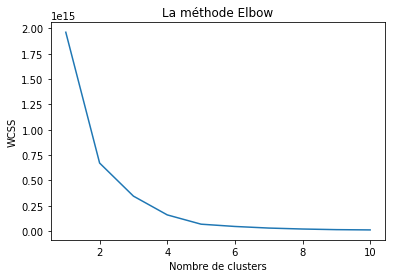

In [3]:
# Utiliser la méthode elbow (= methode du coude) pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
# Construction du modèle : on tente une typologie à 4 classes
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

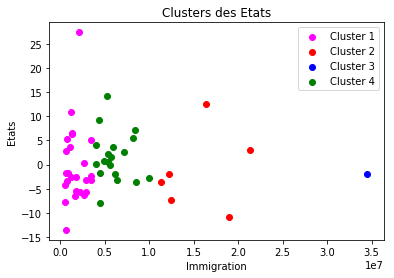

In [5]:
# Visualiser les résultats via un nuage de points
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 5')

plt.title('Clusters des Etats')
plt.xlabel('Immigration')
plt.ylabel('Etats')
plt.legend()

In [6]:
# on recupere la classe des groupes, on l'ajoute à notre jeu de données puis on decrit les classes
labels2 = kmeans.predict(X)
dataset['cluster1'] = labels2
segments = dataset.groupby('cluster1')
segments.describe()

Américains_migrants_avec_letranger                                \
                                      count      mean       std       min   
cluster1                                                                    
0                                      25.0 -0.050244  0.069081 -0.293205   
1                                       6.0 -0.018832  0.017585 -0.045721   
2                                       1.0 -0.043912       NaN -0.043912   
3                                      19.0 -0.042903  0.043290 -0.168621   

                                                 Immigration_domestique_nette  \
               25%       50%       75%       max                        count   
cluster1                                                                        
0        -0.052326 -0.031338 -0.017518 -0.000555                         25.0   
1        -0.030093 -0.012866 -0.005664 -0.002442                          6.0   
2        -0.043912 -0.043912 -0.043912 -0.043912                          1.0   
3        -0.064747 -0.033915 -0.007144 -0.000926                         19.0   

                      ...     Taux_de_naissance            Taux_mortalité  \
              mean    ...                   75%        max          count   
cluster1              ...                                                   
0        -0.288560    ...             14.534775  20.405862           25.0   
1        -1.366631    ...             14.624985  16.856117            6.0   
2        -2.014398    ...             15.371931  15.371931            1.0   
3         1.576799    ...             14.487699  16.156295           19.0   

                                                                       \
              mean       std       min       25%       50%        75%   
cluster1                                                                
0         8.749409  1.628504  4.644884  7.834457  8.998346   9.697661   
1         9.150070  1.343647  7.066254  8.511582  9.239266  10.034678   
2         6.715519       NaN  6.715519  6.715519  6.715519   6.715519   
3         8.684917  1.017640  6.263420  7.871556  8.878553   9.315157   

                     
                max  
cluster1             
0         11.895671  
1         10.786798  
2          6.715519  
3         10.284126  

[4 rows x 64 columns]

In [7]:
# Affichage de la matrice envoyée dans la kmeans juste pour verification
print(X)

[[ 4.46435600e+06 -1.78435591e+00 -2.19516544e-02]
 [ 6.34892000e+05 -1.71840250e+00 -2.39410797e-01]
 [ 5.30733100e+06  1.42506657e+01 -3.39153522e-02]
 [ 2.69209000e+06  3.58086097e-01 -1.33725098e-02]
 [ 3.45011300e+07 -2.01439779e+00 -4.39116052e-02]
 [ 4.41771400e+06  9.31794136e+00 -5.72694384e-02]
 [ 3.42507400e+06 -2.36549634e+00 -1.75178697e-02]
 [ 7.96165000e+05  5.39335439e+00 -4.01926736e-02]
 [ 5.71822000e+05 -7.77164922e+00 -7.34494301e-02]
 [ 1.63965150e+07  1.25211364e+01 -3.47024962e-02]
 [ 8.38391500e+06  7.06829685e+00 -7.14463350e-02]
 [ 1.22439800e+06 -2.49918736e+00 -2.93205314e-01]
 [ 1.32100600e+06  6.40193913e+00 -2.64949591e-02]
 [ 1.24823010e+07 -7.27510096e+00 -1.62630271e-02]
 [ 6.11474500e+06 -1.99468661e+00 -9.81234704e-04]
 [ 2.92317900e+06 -5.68182790e+00 -6.84186634e-04]
 [ 2.69464100e+06 -6.36299975e+00 -5.23260798e-02]
 [ 4.06555600e+06  1.51516791e-01 -5.80486408e-02]
 [ 4.46543000e+06 -7.98467337e+00 -3.53829306e-02]
 [ 1.28667000e+06  6.61630410e+

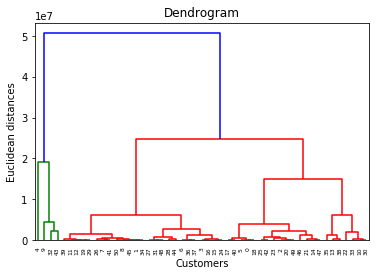

<Figure size 432x288 with 0 Axes>

In [8]:
# Test d'une 2eme technique permettant de choisir le nombre de classe : dendrogramme pour trouver le nb optimal de classes
plt.figure(1)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.savefig('foo1.png')


In [9]:
# 2eme test de realisation d'une kmeans
clustering_method = KMeans(n_clusters = 3, random_state = 9999)
clustering_method.fit(X)
labels = clustering_method.predict(X)


In [10]:
# Affecter la classe au jeu de données
dataset['cluster'] = labels

In [11]:
segments = dataset.groupby('cluster')

In [12]:
segments.describe()

Américains_migrants_avec_letranger                                \
                                     count      mean       std       min   
cluster                                                                    
0                                      7.0 -0.016371  0.017324 -0.045721   
1                                     43.0 -0.048131  0.059107 -0.293205   
2                                      1.0 -0.043912       NaN -0.043912   

                                                Immigration_domestique_nette  \
              25%       50%       75%       max                        count   
cluster                                                                        
0       -0.025483 -0.009468 -0.003419 -0.001601                          7.0   
1       -0.057659 -0.033915 -0.015445 -0.000555                         43.0   
2       -0.043912 -0.043912 -0.043912 -0.043912                          1.0   

                  ...  Taux_mortalité            cluster1                      \
             mean ...             75%        max    count      mean       std   
cluster           ...                                                           
0       -1.557395 ...        9.941045  10.786798      7.0  1.285714  0.755929   
1        0.591794 ...        9.673558  11.895671     43.0  1.255814  1.497506   
2       -2.014398 ...        6.715519   6.715519      1.0  2.000000       NaN   

                                  
         min  25%  50%  75%  max  
cluster                           
0        1.0  1.0  1.0  1.0  3.0  
1        0.0  0.0  0.0  3.0  3.0  
2        2.0  2.0  2.0  2.0  2.0  

[3 rows x 72 columns]